In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
data=pd.read_csv('C:\\Users\\Home\\Desktop\\data\\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

In [6]:
data.columns=col_names

In [7]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#split data into input and target variable
x=data.drop('label',axis=1)
y=data['label']

In [10]:
#before we credit a model we need to standardrize our independent feature by using the standardscalar method from scikit
#standardize the dataset

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [11]:
x_scaled[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [12]:
data.iloc[0]

pregnant      6.000
glucose     148.000
bp           72.000
skin         35.000
insulin       0.000
bmi          33.600
pedigree      0.627
age          50.000
label         1.000
Name: 0, dtype: float64

In [13]:
#split into train and test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=42)

In [14]:
#create the classifier
#now is time to create our random forest classifier and then train it on the train set
#we will also pass the number of trees(100) in the forest we want to use through the parameter called n_estimator
classifier=RandomForestClassifier(n_estimators=100)

In [15]:
#train the model using the training sets
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
#prediction the test set
y_pred=classifier.predict(x_test)

In [17]:
#calculate model Accuracy
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.7207792207792207


# Identify important features

In [18]:
#check important features(correlation)
feature_importances_df=pd.DataFrame({'feature':list(x.columns),'important':classifier.feature_importances_}).sort_values('important',ascending=False)
#display
feature_importances_df

,feature,important
1,glucose,0.255954
5,bmi,0.166172
7,age,0.147534
6,pedigree,0.118578
2,bp,0.090966
0,pregnant,0.080359
4,insulin,0.075224
3,skin,0.065214


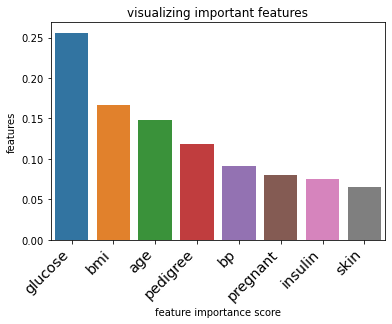

In [19]:
#visualize important  features
#creating a bar plot
sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.important)

#add labels to your bargraph
plt.xlabel("feature importance score")
plt.ylabel('features')
plt.title('visualizing important features')
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show()

<AxesSubplot:>

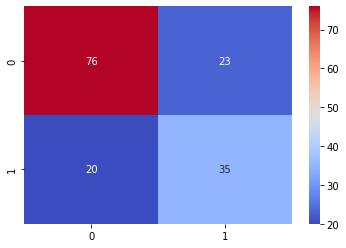

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),yticklabels=True,cmap='coolwarm',annot=True)

In [21]:
y_test.value_counts()

0    99
1    55
Name: label, dtype: int64

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



# Hyper_parameter updates

In [23]:
classifier_1=RandomForestClassifier(n_estimators=500,max_depth=3,min_samples_leaf=5,max_features=5)
classifier_1.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                       n_estimators=500)

In [24]:
#predict from the updates model
updated_y_pred=classifier_1.predict(x_test)

In [25]:
#Calculating Model Accurancy
print('Accurancy:',accuracy_score(y_test,updated_y_pred))

Accurancy: 0.7662337662337663


In [26]:
#features importance
#check important features
new_feature_importances_df=pd.DataFrame({'features':list(x.columns),'importance':classifier_1.feature_importances_}).sort_values('importance',ascending=False)

In [27]:
new_feature_importances_df

,features,importance
1,glucose,0.538657
5,bmi,0.186186
7,age,0.184502
6,pedigree,0.031060
4,insulin,0.024149
0,pregnant,0.017095
3,skin,0.010931
2,bp,0.007419


<AxesSubplot:xlabel='features', ylabel='importance'>

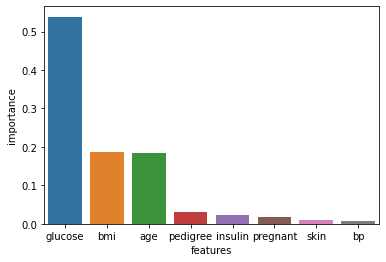

In [28]:
#visualization for updated important features
#creating a bar plot
sns.barplot(x=new_feature_importances_df.features,y=new_feature_importances_df.importance)

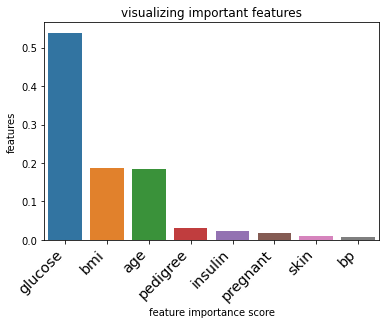

In [29]:
sns.barplot(x=new_feature_importances_df.features,y=new_feature_importances_df.importance)

#add labels to your
plt.xlabel('feature importance score')
plt.ylabel('features')
plt.title('visualizing important features')
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
#plt.xticks(rotation=45,horizontalaligment='right',fontweight='light',fontsize='x_large')
plt.show()

<AxesSubplot:>

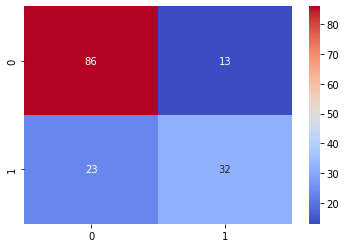

In [30]:
sns.heatmap(confusion_matrix(y_test,updated_y_pred),yticklabels=True,cmap='coolwarm',annot=True)

In [31]:
print(classification_report(updated_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       109
           1       0.58      0.71      0.64        45

    accuracy                           0.77       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.78      0.77      0.77       154



# few important details of model

In [32]:
classifier_1.base_estimator
classifier_1.classes_
classifier_1.estimators_

[DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=2001223407),
 DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=1208844846),
 DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=1344750259),
 DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=1838336182),
 DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=911074296),
 DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=2109175573),
 DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=1102268811),
 DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                        random_state=475219878),
 DecisionTreeClass

In [33]:
#class validation
from sklearn.model_selection import KFold

In [34]:
kf=KFold()

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
result=cross_val_score(classifier,x_scaled,y,cv=kf)#improve accuracy by kFold

In [37]:
result

array([0.75974026, 0.68181818, 0.78571429, 0.83006536, 0.77124183])

In [38]:
from sklearn.model_selection import StratifiedKFold

In [39]:
skf=StratifiedKFold(n_splits=5)

In [40]:
skf.get_n_splits(x_scaled,y)

5

In [41]:
result=cross_val_score(classifier,x_scaled,y,cv=skf)#improve accuracy by stratifiedKfold

In [42]:
result

array([0.75324675, 0.72727273, 0.75324675, 0.81045752, 0.76470588])